In [184]:
# TD:

# Flesh out business problem.
# Annotate what's going into each model.
# Write better explanation for F1.
# Write better explanation for train-test-val split.
# Better iterations of models. 
# Model selection based on val_loss? Or recall?
# Save all final DFs.
# Separate visualization notebook.

# Tweeting about Disaster
## Using neural networks to detect tweets about real crises

Flatiron School Data Science: Project 4

Advanced Machine Learning Topics **********
- **Author**: Zaid Shoorbajee
- **Instructor**: Morgan Jones
- **Pace**: Flex, 40 weeks

## Business Problem Overview

An international news outlet, *The Flatiron Post*, wants to be able to report on stories of crises and natural disasters in a prompt manner. News about plane crashes, hurricanes, earthquakes, terrorist threats, and other topics occurs without warning. New information emerges by the second, and being late to the story can mean not only losing to the competition, but also leaving your audience in the dark and allowing speculation to run amok. 

The *Post* wants to tap into Twitter as a resource in order to detect such disasters in real time, and it’s employing a data scientist for the task. Twitter is a firehose of information—there is a lot more noise than signal, and reporters would waste a lot of time staring at their Twitter feeds just waiting for disaster tweets. But chances are that if a disaster is occurring, someone is tweeting about it.

The task of the data scientist is to use natural language processing and machine learning in order to systematically tell if a tweet is about a real disaster or not. Such tweets can then theoretically be presented to reporters in a separate feed.



## Data Undersanding

The core type of data being used for this task is the text of tweets. This is **unstructured data** and requires natural language processing (NLP) techniques in order to be interpretable by a machine learning model, such as a neural network.

An added challenge is that disaster and non-disaster tweets can use many of the same words, but context changes everything. The following two tweets both have the words "explosion" and "fire" in them. It's easy for any literate person to see that one is about a real disaster, while the other is not. 

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">BREAKING: Small explosion and fire at the Hoover Dam; cause unknown <a href="https://t.co/Y2YfPVvGaH">pic.twitter.com/Y2YfPVvGaH</a></p>&mdash; BNO News (@BNONews) <a href="https://twitter.com/BNONews/status/1549444981408022528?ref_src=twsrc%5Etfw">July 19, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

___

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">spicy dan dan noodles is an explosion of flavor. my mouth is def on fire though.🥹😛💙</p>&mdash; kat ᵍᵐ (@jpegkat) <a href="https://twitter.com/jpegkat/status/1549202432688697344?ref_src=twsrc%5Etfw">July 19, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

For a computer, however, it's not so simple. To make tweets interpretable by a neural network, some of the following NLP techniques must be used:

* Tokenization
* Lemmatization
* Removing stop words
* Vectorization
* Part-of-speech tagging
* Named entity recognition
* Meta-feature extraction
    * Character count, word count, etc.

The idea is that converting tweets into the signals listed above should allow a machine learning model to discern the difference between a disaster tweet and non-disaster tweet.

## Dataset and Features

Lorem ipsum



## Scoring and Evaluation

Lorem ipsum

In [2]:
import time
start_time = time.time()
def time_check(start=None):
    if start:
        t = time.time() - start
    else:
        t = time.time() - start_time
    print(f'Time check: {t//60:.0f} minutes and {t%60:.0f} seconds')

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

from nltk import FreqDist
from nltk.tokenize import \
    regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from keras import models
from keras import layers
from keras import regularizers
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import LeakyReLU

import re
from collections import OrderedDict, defaultdict, Counter
import itertools
import string

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

pd.options.display.max_colwidth = 150
seed = 7

In [4]:
# Need to revise headers


## Data Preparation

In [5]:
# Loading and previewing the dataset

df = pd.read_csv('./data/disaster_tweets/train.csv')
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### Keyword and location columns

The `location` column doesn't have much usable information in some cases it's just nonsense:

In [8]:
print('Sample of some of the location values')
df['location'].unique()[7:17].tolist()

Sample of some of the location values


['World Wide!!',
 'Paranaque City',
 'Live On Webcam',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim']

Therefore I can't use the `location` column without some pre-processing. I will fill the missing values with `location_missing` for now. Later, when I'm processing more of the text data, I'll extract some information from this column.

In [9]:
df['location'] = df['location'].fillna('location_missing')

The `keyword` column shows what was used to search for relevant tweets. Realistically, `keyword` isn't a feature that will always be available when trying to predict tweets spotted "in the wild." Furthermore, the client might add or remove keywords from its repertoire of search terms. For these reasons, I won't be using it as a feature to train the model. 

However, this column can give use insight as to what kinds of tweets the keywords yield. 

In [10]:
df['keyword'].value_counts(dropna=False)

NaN                      61
fatalities               45
deluge                   42
armageddon               42
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

`keyword` has 61 missing values

In [11]:
# Filling missing values with 'missing_keyword' so I can visualize.

df['keyword'] = df['keyword'].fillna('keyword_missing')

In [12]:
# %20 is the HTML entity for a "space" character

df['keyword'] = df['keyword'].apply(lambda x: x.replace('%20', ' '))

In [13]:
# Creating a separate DF for visualization purposes

df_kw = df[['keyword', 'target']]
df_kw['kw_target_mean'] = df_kw.groupby('keyword')['target'].transform('mean')

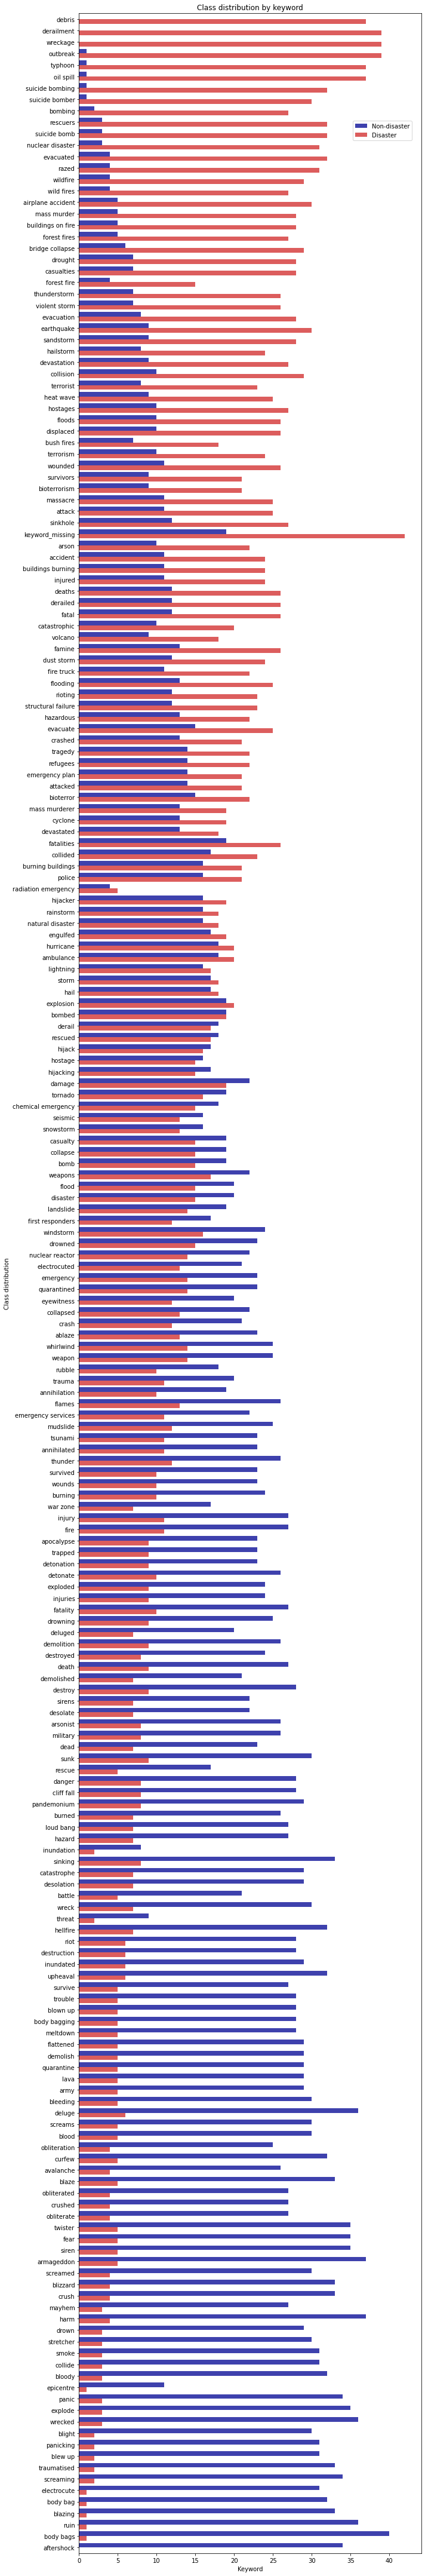

In [14]:
color_non = '#2c2fbf'
color_disaster ='#f14848'

fig, ax = plt.subplots(figsize=(10, 60))

sns.countplot(
    y=df_kw.sort_values(by='kw_target_mean', ascending=False)['keyword'],
    hue=df_kw.sort_values(by='kw_target_mean', ascending=False)['target'],
    palette=[color_non, color_disaster],
    ax=ax
)
ax.set_title('Class distribution by keyword')
ax.set_xlabel('Keyword'),
ax.set_ylabel('Class distribution')
plt.legend(['Non-disaster', 'Disaster'], loc=(.8,.95))
plt.tight_layout()
plt.show()


### Tweets and Target
The main feature is `text`, which is the full text of the given tweet. Each tweet is labeled in `target` as referring to a disaster (1) or not (0).
#### Duplicate tweets
Before proceeding, I'll check if there are any tweets that are duplicated.

In [15]:
df['text'].duplicated().sum()

110

There are numerous duplicate tweets, perhaps tweeted by different accounts. The most concerning part of this is that some of these duplicates have contradicting labels. Here are a few examples:

In [16]:
df[df['text'] == "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam"]

,id,keyword,location,text,target
3240,4656,engulfed,location_missing,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,0
3243,4659,engulfed,Kuwait,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,1
3248,4669,engulfed,Bahrain,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,1
3251,4672,engulfed,location_missing,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,0
3261,4684,engulfed,location_missing,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,0
3266,4691,engulfed,location_missing,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,0


In [17]:
df[df['text'] == ".POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4"]

,id,keyword,location,text,target
2830,4068,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,1
2831,4072,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,1
2832,4076,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,0
2833,4077,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,1


In [18]:
df[df['text'] == "Caution: breathing may be hazardous to your health."]

,id,keyword,location,text,target
4232,6012,hazardous,location_missing,Caution: breathing may be hazardous to your health.,1
4235,6017,hazardous,location_missing,Caution: breathing may be hazardous to your health.,0


In [19]:
df[df['text'] == "like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit"]

,id,keyword,location,text,target
1221,1760,buildings burning,dallas,like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,1
1349,1950,burning buildings,dallas,like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,0


It seems that some of these tweets were labeled sloppily or are difficult to interpret. In any case, having identical tweets labeled differently will cause unwanted noise in the model. Therefore, I'll drop all duplicated tweets, which account for less than 2% of the dataset.

In [20]:
# Proportion of duplicate tweets

df['text'].duplicated().sum() / len(df)

0.0144489688690398

In [21]:
df = df.drop_duplicates(subset = 'text', keep=False)

#### Separating features from target

In [22]:
tweets = df.drop(columns='target')
target = df['target']

In [23]:
print('Distribution of Target')
print()
print(target.value_counts())
print()
print('Normalized:')
print(target.value_counts(normalize=True))

Distribution of Target

0    4284
1    3150
Name: target, dtype: int64

Normalized:
0    0.576271
1    0.423729
Name: target, dtype: float64


About 42% of the tweets have been labeled as actual disaster tweets. This is not a major imbalance, and this I won't need to artificially rebalance the dataset.

#### Train-Test Split

In [24]:
# Splitting the full dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    tweets, target, test_size=0.2, random_state=seed
)

# Splitting off a validation set

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=.5, random_state=seed
)

### Cleaning and tokenizing the tweet text

In [25]:
# Saving a copy of untouched tweets
X_train_tweets_unprocessed = X_train.copy()['text'] 

X_test_tweets_unprocessed = X_test.copy()['text'] 

X_val_tweets_unprocessed = X_val.copy()['text'] 

In [26]:
# Make everything lowercase

X_train['text'] = X_train['text'].apply(lambda x: x.lower())

In [27]:
X_train.head(10)

,id,keyword,location,text
39,57,ablaze,Paranaque City,ablaze for you lord :d
418,607,arsonist,heccfidmss@gmail.com,@local_arsonist @diamorfiend the legal system never forgets
4916,7001,mayhem,"Orlando, FL",i guess ill never be able to go to mayhem...
2126,3054,deaths,location_missing,bigamist and his û÷firstûª wife are charged in the deaths of his û÷secondûª pregnant wife her child 8 her mother her nephew 1 and their uû_
1054,1523,body bags,ANYWEHERE !!,status: last seen buying body bags.
688,992,blazing,location_missing,@baseballquotes1 i have a 32 inch dynasty
3193,4584,emergency plan,Indiana,do you have a plan? emergency preparedness for #families of\nchildren with special needs http://t.co/rdovqauax5 #autism #specialneeds
194,273,ambulance,Loveland Colorado,@kiwi_karyn check out what's in my parking lot!! he said that until last year it was an ambulance in st johns. http://t.co/hpvodud7ip
7495,10722,wreck,"Greenville, S.C.",greer man dies in wreck http://t.co/n2qzbmzuly
5987,8550,screams,"Pennsylvania, USA",*screams internally*


### Dealing with URLs

Many tweets contain URLs, which, from an NLP standpoint are essentially random strings and thus won't be useful as vectorized tokens. But before I remove them, I will turn the presence of a URL into a binary feature.

In [28]:
def binary_url(text):
    """
    Returns 1 if a string contains a URL, else returns 0.
    """
    search = re.search(pattern=r'http\S+', string=text)
    return int(bool(search))

# Making a series indicating whether the tweet has a URL. I will use this later when extracting more meta-features.

has_url_Series_train = X_train['text'].apply(binary_url).rename('has_url')

In [29]:
# Removing URLs from all tweets

X_train['text'] = X_train['text'].apply(
    lambda x: re.sub(
        pattern=r'http\S+', repl='', string=x)
        )

### Tokenizing tweets

#### I plan to make multiple tokenized versions of each tweet.
* Basic version: Any word with at least two letters. Strips the symbols for hashtags (#) and mentions(@)
* Basic version, excluding stop words
* Lemmatized version of basic version
* Lemmatized version of basic version, exluding stop words.

In [30]:
example_tweet = X_train['text'].loc[1245]
example_tweet

'shootings explosions hand grenades thrown at cars and houses &amp; vehicles and buildings set on fire. it all just baffles me.is this sweden?'

In [31]:
token_pattern = r"[a-zA-Z]+'?[a-zA-Z]+|\b[iIaA]\b"
# Pattern: Any word with at least two characters, including up to one apostrophe
# Also captures the English words "I" and "and".

tokenizer = RegexpTokenizer(token_pattern)

Let's see how well the tokenizer does with the pattern I used above.

In [32]:
print(tokenizer.tokenize(example_tweet))

['shootings', 'explosions', 'hand', 'grenades', 'thrown', 'at', 'cars', 'and', 'houses', 'amp', 'vehicles', 'and', 'buildings', 'set', 'on', 'fire', 'it', 'all', 'just', 'baffles', 'me', 'is', 'this', 'sweden']


That seems to work. However, 'amp' is an artifact of "&amp;", which is the HTML entity for an ampersand ("&").

I will replace any instance of "&amp;" with the word "and" in the original text.

In [33]:
X_train['text'] = X_train['text'].apply(lambda x: re.sub("&amp;", "and", x))

In [34]:
X_train['tokens'] = X_train['text'].apply(tokenizer.tokenize)

In [35]:
# Check most common tokens

top_20_tokens = FreqDist(X_train['tokens'].explode()).most_common(20)
top_20_tokens

[('the', 2575),
 ('a', 1721),
 ('in', 1558),
 ('to', 1526),
 ('of', 1426),
 ('and', 1368),
 ('i', 1141),
 ('is', 742),
 ('for', 696),
 ('on', 683),
 ('you', 625),
 ('my', 536),
 ('that', 462),
 ('it', 444),
 ('by', 420),
 ('at', 419),
 ('with', 411),
 ('this', 363),
 ('from', 319),
 ('be', 313)]

#### All tweets have been tokenized. Now I will make a version without stop words.

To make a comprehensive list of stop words, I will combine the default lists from the NLTK and SpaCy libraries.

In [36]:
sw_spacy = list(nlp.Defaults.stop_words)
sw_nltk = stopwords.words('english')
stopword_list = list(set(sw_spacy + sw_nltk))

In [37]:
X_train['tokens_no_sw'] = \
    X_train['tokens'].apply(
        lambda x: [w for w in x if not w in stopword_list]
    )

In [38]:
# Check most common tokens (without stop words)

FreqDist(X_train['tokens_no_sw'].explode()).most_common(20)

[('like', 271),
 ('fire', 189),
 ("i'm", 189),
 ('new', 182),
 ('news', 176),
 ('people', 170),
 ('video', 133),
 ('emergency', 127),
 ('police', 115),
 ('disaster', 113),
 ('time', 106),
 ('day', 102),
 ('body', 101),
 ('man', 97),
 ('suicide', 96),
 ('rt', 95),
 ('know', 95),
 ('california', 91),
 ('storm', 90),
 ('world', 89)]

"i'm" should also be considered a stop word

In [39]:
stopword_list.extend(["i'm"])

In [40]:
X_train['tokens_no_sw'] = \
    X_train['tokens'].apply(
        lambda x: [w for w in x if not w in stopword_list]
    )

In [41]:
# Check most common tokens (without stop words)

top_20_tokens_no_sw = FreqDist(X_train['tokens_no_sw'].explode()).most_common(20)
top_20_tokens_no_sw

[('like', 271),
 ('fire', 189),
 ('new', 182),
 ('news', 176),
 ('people', 170),
 ('video', 133),
 ('emergency', 127),
 ('police', 115),
 ('disaster', 113),
 ('time', 106),
 ('day', 102),
 ('body', 101),
 ('man', 97),
 ('suicide', 96),
 ('rt', 95),
 ('know', 95),
 ('california', 91),
 ('storm', 90),
 ('world', 89),
 ('crash', 86)]

Previewing the restulting features:

In [42]:
X_train.head()

,id,keyword,location,text,tokens,tokens_no_sw
39,57,ablaze,Paranaque City,ablaze for you lord :d,"[ablaze, for, you, lord]","[ablaze, lord]"
418,607,arsonist,heccfidmss@gmail.com,@local_arsonist @diamorfiend the legal system never forgets,"[local, arsonist, diamorfiend, the, legal, system, never, forgets]","[local, arsonist, diamorfiend, legal, system, forgets]"
4916,7001,mayhem,"Orlando, FL",i guess ill never be able to go to mayhem...,"[i, guess, ill, never, be, able, to, go, to, mayhem]","[guess, ill, able, mayhem]"
2126,3054,deaths,location_missing,bigamist and his û÷firstûª wife are charged in the deaths of his û÷secondûª pregnant wife her child 8 her mother her nephew 1 and their uû_,"[bigamist, and, his, first, wife, are, charged, in, the, deaths, of, his, second, pregnant, wife, her, child, her, mother, her, nephew, and, their]","[bigamist, wife, charged, deaths, second, pregnant, wife, child, mother, nephew]"
1054,1523,body bags,ANYWEHERE !!,status: last seen buying body bags.,"[status, last, seen, buying, body, bags]","[status, seen, buying, body, bags]"


In [43]:
time_check()

Time check: 0 minutes and 21 seconds


### Lemmatizing tweets

Now I want to make a version of these tokenized tweets where each word is lemmatized. **Lemmatization** is _________.

I will the tokenizer I made above, then the SpaCy library's lemmatizer to do this. Essentially I am making my own tokenizing function, where the output is lemmatized tokens instead of just plain tokens.

In [44]:
def spacy_lemmatize(text):
    """
    Uses NLTK and SpaCy to tokenize a string and return the lemma of each token.
    """
    sents = [s.text for s in nlp(text).sents]
    sents_tokenized = [tokenizer.tokenize(sent) for sent in sents]
    docs = [nlp(' '.join(tokens)) for tokens in sents_tokenized]
    docs_lemmatized = [[t.lemma_.lower() for t in doc] for doc in docs]
    return list(itertools.chain.from_iterable(docs_lemmatized))

In [45]:
# Lemmatized tokens, including stop words

X_train['lemmas'] = X_train['text'].apply(spacy_lemmatize)

In [46]:
# Check most common lemmas

top_20_lemmas = FreqDist(X_train['lemmas'].explode()).most_common(20)
top_20_lemmas

[('be', 2683),
 ('the', 2575),
 ('a', 1722),
 ('i', 1719),
 ('to', 1570),
 ('in', 1558),
 ('of', 1426),
 ('and', 1369),
 ('you', 726),
 ('for', 696),
 ('on', 683),
 ('not', 635),
 ('have', 628),
 ('it', 599),
 ('my', 536),
 ('that', 510),
 ('do', 492),
 ('by', 420),
 ('at', 419),
 ('with', 411)]

In order to make the lemmatized tokens without stop words, I will also need to lemmatize the stop words.

This has to be done to the stop words while they are still within the string because  SpaCy uses grammatical context to lemmatize.

In [47]:
# Lemmatized version of stop words based on training set

stopword_list_lem = []

sw_lem_Series = \
    X_train['tokens'].apply(
    lambda x: [t.lemma_.lower() for t in nlp(' '.join(x)) if t.text in stopword_list]
    )

for row in sw_lem_Series:
    stopword_list_lem.extend(row)

stopword_list_lem = list(set(stopword_list_lem))

In [48]:
# Lemmatized tokens, excluding stop words

X_train['lemmas_no_sw'] = X_train['lemmas'].apply(
    lambda x: [l for l in x if l not in stopword_list_lem]
    )

In [49]:
# Check most common lemmas (without stop words)

top_20_lemmas_no_sw = FreqDist(X_train['lemmas_no_sw'].explode()).most_common(20)
top_20_lemmas_no_sw

[('like', 313),
 ('fire', 272),
 ('new', 188),
 ('news', 176),
 ('people', 172),
 ('kill', 147),
 ('video', 138),
 ('time', 137),
 ('emergency', 128),
 ('day', 126),
 ('year', 125),
 ('attack', 124),
 ('bomb', 124),
 ('man', 123),
 ('crash', 123),
 ('burn', 123),
 ('come', 123),
 ('body', 120),
 ('disaster', 116),
 ('know', 115)]

In [50]:
time_check()

Time check: 3 minutes and 8 seconds


### Visualizing and comparing frequency
Here, I'll visualize the top 20 words in `X_train` for disaster tweets vs. non-disaster tweets. I should be able to see which words the classes have in common, as well as which processed version of the tweets is most different.

In [51]:
def plot_freqdict_classes(series, y, token_type='Tokens (unspecified kind))', cutoff=20):
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    fd_0 = FreqDist(series[y==0].explode()).most_common(cutoff)
    fd_0 = OrderedDict(fd_0)
    tokens_0 = list(fd_0.keys())[::-1]
    freq_0 = list(fd_0.values())[::-1]
    fd_1 = FreqDist(series[y==1].explode()).most_common(cutoff)
    fd_1 = OrderedDict(fd_1)
    tokens_1 = list(fd_1.keys())[::-1]
    freq_1 = list(fd_1.values())[::-1]
    shared_tokens = [t for t in tokens_0 if t in tokens_1]
    axes[0].barh(y=tokens_0, width=freq_0, color=['C6' if token in shared_tokens else 'C0' for token in tokens_0])
    axes[1].barh(y=tokens_1, width=freq_1, color=['C6' if token in shared_tokens else 'C0' for token in tokens_1])
    axes[0].set_ylabel('Tokens', size=10)
    axes[0].set_xlabel('Frequency', size=10)
    axes[1].set_xlabel('Frequency', size=10)
    fig.suptitle(f'Top {cutoff} {token_type}', size=15)
    axes[0].set_title('Non-Disaster')
    axes[1].set_title('Disaster')
    custom_bars = [Line2D([0], [0], color='C6', lw=10), Line2D([0], [0], color='C0', lw=10)]
    axes[0].legend(custom_bars, ['In common', 'Not in common'])
    axes[1].legend(custom_bars, ['In common', 'Not in common'])
    plt.tight_layout()
    plt.show()

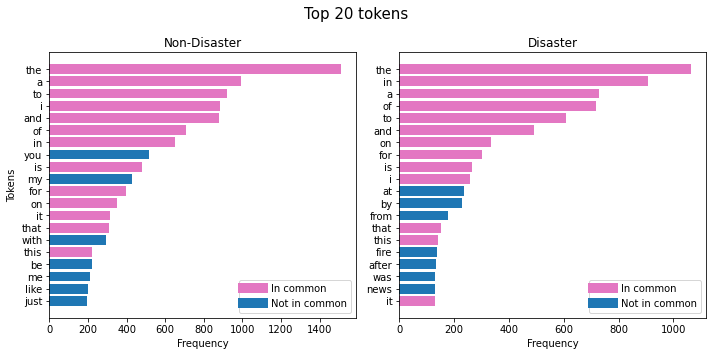

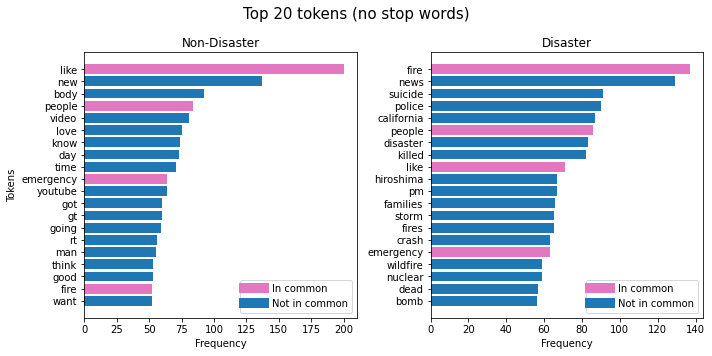

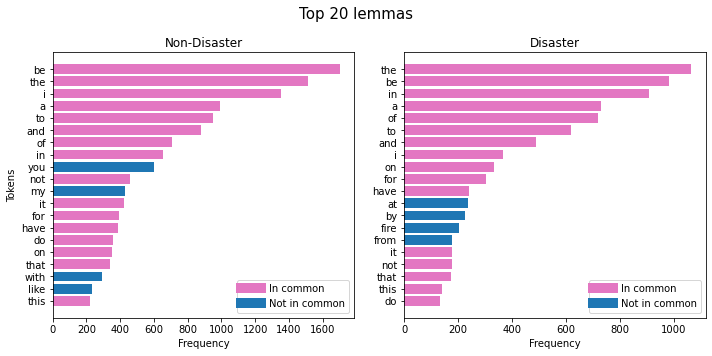

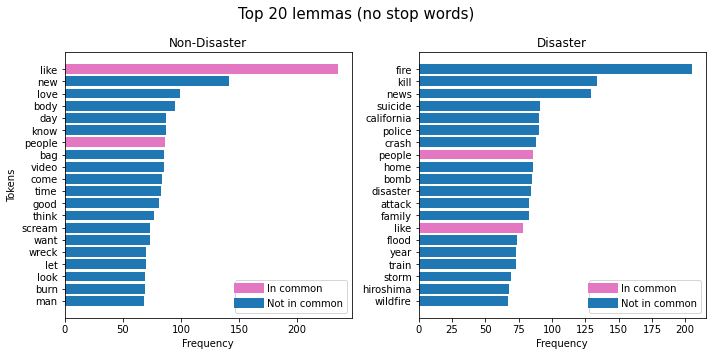

In [52]:
plot_freqdict_classes(X_train['tokens'], y_train, 'tokens')
plot_freqdict_classes(X_train['tokens_no_sw'], y_train, 'tokens (no stop words)')
plot_freqdict_classes(X_train['lemmas'], y_train, 'lemmas')
plot_freqdict_classes(X_train['lemmas_no_sw'], y_train, 'lemmas (no stop words)')

I can tell from the charts above the version of tweets that are the most different in terms of token frequency is the **lemmatized tweets with no stop words.** In the top 20 tokens from each class, there are only two shared tokens. In contrast, if stop words are not removed, most tokens are shared between classes.

### More linguistic feature engineering

I will use the SpaCy library to extract more linguistic features from the tweets.

### Vectorized part of speech (POS) tags

The SpaCy library is pre-trained to parse through sentences and identify each word's grammatical part of speech.

Here are some examples of what the tool can identify:

In [53]:
pos_samples = X_train['text'].loc[[5905, 4355, 7119, 7312, 3143]]
pos_samples = pos_samples.apply(lambda x: nlp(x).sents)
pos_samples = pos_samples.apply(lambda x: [s.text for s in x])
pos_samples = pos_samples.apply(lambda x: [tokenizer.tokenize(s) for s in x])
pos_samples = pos_samples.apply(lambda x: [' '.join(s) for s in x])
pos_samples = pos_samples.apply(lambda x: '. '.join(x))

options_displacy_pos = {'compact':True, 'distance':90, 'bg':'#3056ff', 'color':'fff'}

for idx in pos_samples.index:
    print(pos_samples.loc[idx])
    displacy.render(nlp(pos_samples.loc[idx]), style='dep', jupyter=True, options=options_displacy_pos)

watch this airport get swallowed up by a sandstorm in under a minute


governor allows parole for california school bus hijacker who kidnapped children in. 


a brief violent storm swept through the chicago area sunday afternoon leading to one death and an evacuation of lollapalooza and more


firefighters from connecticut are headed to california to fight wild fires


plane from new york to kuwait diverts to uk after declaring state of emergency


I plan to use this SpaCy tool in order to vectorize the detailed [parts of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) of each tweet.

First, I'll convert each token into a string of its POS tag.

In [54]:
# Spacy POS

def spacy_pos(text):
    """
    Takes in a string and returns a list of part of speech tokens.
    """
    sents = [s.text for s in nlp(text).sents]
    sents_tokenized = [tokenizer.tokenize(sent) for sent in sents]
    docs = [nlp(' '.join(tokens)) for tokens in sents_tokenized]
    pos_tokens = [[t.pos_ for t in doc] for doc in docs]
    return list(itertools.chain.from_iterable(pos_tokens))

# Testing the function on a sample
X_train['text'].sample(10, random_state=seed).apply(spacy_pos)

4410                                                                [NOUN, NOUN, ADP, PROPN, PROPN, ADP, ADP, PROPN, PROPN, PROPN, PROPN, NOUN]
2661                                                                                                      [DET, PROPN, PROPN, ADJ, NOUN, PROPN]
2899                                                                                                [PROPN, ADV, SCONJ, VERB, PRON, VERB, PRON]
1608                                       [PROPN, PROPN, PROPN, PART, NOUN, NOUN, VERB, SCONJ, NOUN, NOUN, VERB, SCONJ, NOUN, VERB, ADP, VERB]
2756    [VERB, INTJ, PRON, VERB, CCONJ, PRON, AUX, DET, NOUN, NOUN, PRON, VERB, NOUN, ADP, SCONJ, PRON, ADV, VERB, NOUN, ADV, PRON, VERB, PRON]
5086                                     [SCONJ, ADJ, ADJ, NOUN, VERB, ADP, PROPN, PROPN, NOUN, NOUN, AUX, ADV, ADJ, ADP, PRON, ADJ, ADJ, NOUN]
7441                     [PRON, AUX, ADV, ADV, ADJ, NOUN, PRON, ADV, VERB, PART, VERB, PRON, VERB, PRON, NOUN, PRON, PRON, ADV, VERB, AU

In order to make the POS vectors, I'm using scikit-learn's CountVectorizer in a slightly unorthodox way. I'm using it to count POS tags rather than tokens.

In [55]:
# Making dataframes of vectorized POS tags

pos_vectorizer = CountVectorizer(tokenizer=spacy_pos)
pos_vec_train = pos_vectorizer.fit_transform(X_train['text'])
pos_vec_df_train = pd.DataFrame(
        pos_vec_train.toarray(),
        columns=pos_vectorizer.get_feature_names_out(),
        index=X_train.index
)

In [56]:
pos_vec_df_train.head()

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB,X
39,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
418,2,0,1,0,0,1,0,2,0,0,0,0,0,0,2,0
4916,1,1,2,1,0,0,0,0,0,1,2,0,0,0,2,0
2126,3,2,0,1,2,1,0,7,0,0,6,0,0,0,1,0
1054,0,0,1,0,0,0,0,3,0,0,0,0,0,0,2,0


This matrix of parts-of speech will hopefully be useful to the model, but I can take it even further. I'm going to look at disparities in the proportions of POS tags between each class.

In [57]:
pos_vec_df_norm_train = pos_vec_df_train.div(pos_vec_df_train.sum(axis=1), axis=0)
pos_vec_df_norm_train.columns = pos_vec_df_train.columns + '_norm'
pos_vec_df_norm_train.head()

,ADJ_norm,ADP_norm,ADV_norm,AUX_norm,CCONJ_norm,DET_norm,INTJ_norm,NOUN_norm,NUM_norm,PART_norm,PRON_norm,PROPN_norm,PUNCT_norm,SCONJ_norm,VERB_norm,X_norm
39,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.25000,0.25,0.0,0.0,0.000000,0.0
418,0.250000,0.000000,0.125000,0.000000,0.000000,0.125000,0.0,0.250000,0.0,0.0,0.00000,0.00,0.0,0.0,0.250000,0.0
4916,0.100000,0.100000,0.200000,0.100000,0.000000,0.000000,0.0,0.000000,0.0,0.1,0.20000,0.00,0.0,0.0,0.200000,0.0
2126,0.130435,0.086957,0.000000,0.043478,0.086957,0.043478,0.0,0.304348,0.0,0.0,0.26087,0.00,0.0,0.0,0.043478,0.0
1054,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.0,0.00000,0.00,0.0,0.0,0.333333,0.0


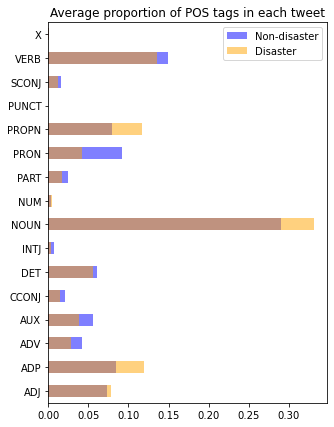

In [58]:
fig, ax = plt.subplots(figsize=(5,7))

pos_plot_0 = pos_vec_df_norm_train[y_train==0].mean().plot(
    kind='barh',
    ax=ax,
    color='blue', alpha=0.5,
    label='Non-disaster'
)
pos_plot_1 = pos_vec_df_norm_train[y_train==1].mean().plot(
    kind='barh',
    ax=ax,
    color='orange', alpha=0.5,
    label='Disaster'
)
ax.set_title('Average proportion of POS tags in each tweet')
ax.set_yticklabels(pos_vec_df_train.columns)
ax.legend()
plt.show()

Between the two classes, there are noticeable disparities with the following POS tags:

* ADP: adposition
* ADV: adverb
* AUX: auxiliary
* NOUN: Noun
* PRON: Pronoun
* PROPN: Proper noun

In [59]:
interesting_tags = ['ADP_norm', 'ADV_norm', 'AUX_norm', 'NOUN_norm', 'PRON_norm', 'PROPN_norm']

pos_vec_df_train = pos_vec_df_train.join(pos_vec_df_norm_train[interesting_tags])

In [60]:
pos_vec_df_train.head()

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,...,PUNCT,SCONJ,VERB,X,ADP_norm,ADV_norm,AUX_norm,NOUN_norm,PRON_norm,PROPN_norm
39,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.250000,0.000000,0.000000,0.000000,0.25000,0.25
418,2,0,1,0,0,1,0,2,0,0,...,0,0,2,0,0.000000,0.125000,0.000000,0.250000,0.00000,0.00
4916,1,1,2,1,0,0,0,0,0,1,...,0,0,2,0,0.100000,0.200000,0.100000,0.000000,0.20000,0.00
2126,3,2,0,1,2,1,0,7,0,0,...,0,0,1,0,0.086957,0.000000,0.043478,0.304348,0.26087,0.00
1054,0,0,1,0,0,0,0,3,0,0,...,0,0,2,0,0.000000,0.166667,0.000000,0.500000,0.00000,0.00


In [61]:
time_check()

Time check: 5 minutes and 1 seconds


### Vectorized named-entity recognition (NER) tags 
SpaCy also has the capability of recognizing "named-entities" such as places, companies, dates, people, and more. Here are some examples of what the tool can identify.

In [62]:
# X_train['text'][(ner_vec_df_train['GPE'] > 0) & (ner_vec_df_train['ORG'] > 0)].sample(3)

In [63]:
ner_samples = X_train['text'].loc[[5642, 2945, 7119, 7312, 6428]]
ner_samples = ner_samples.apply(lambda x: nlp(x).sents)
ner_samples = ner_samples.apply(lambda x: [s.text for s in x])
ner_samples = ner_samples.apply(lambda x: [tokenizer.tokenize(s) for s in x])
ner_samples = ner_samples.apply(lambda x: [' '.join(s) for s in x])
ner_samples = ner_samples.apply(lambda x: '. '.join(x))

for idx in ner_samples.index:
    displacy.render(nlp(ner_samples.loc[idx]), style='ent', jupyter=True)

For the purposes of identifying disaster tweets, here are the [NER tags](https://towardsdatascience.com/explorations-in-named-entity-recognition-and-was-eleanor-roosevelt-right-671271117218) I am interested in:

* **GPE**: Countries, cities, states.
* **LOC**: Non-GPE locations, mountain ranges, bodies of water.
* **NORP**: Nationalities or religious or political groups.
* **ORG**: Companies, agencies, institutions, etc.

I am again using scikit-learn's CountVectorizer to count the entities that SpaCy finds in each tweet.

In [64]:
# Spacy NER

def spacy_ner(
    text, 
    ner_tags=['GPE', 'NORP', 'ORG', 'LOC']
    ):
    """
    Takes in a string and returns a list of named-entity recognition tags.
    Also takes in a specific list of NER tags to look for.
    To look for all NER tags supported by SpaCy, set `ner_tags=None`.
    Intended use is to use this function as a tokenizer in an sklearn vectorizor.
    """
    tokens = tokenizer.tokenize(text)
    doc = nlp(' '.join(tokens))
    ents = doc.ents
    if ner_tags:
        tags = [ent.label_ for ent in ents if ent.label_ in ner_tags]
        return tags
    else:
        tags = [ent.label_ for ent in ents]
        return tags

In [65]:
# Making dataframes of vectorized NER tags

ner_vectorizer = CountVectorizer(tokenizer=spacy_ner)
ner_vec_train = ner_vectorizer.fit_transform(X_train['text'])
ner_vec_df_train = pd.DataFrame(
        ner_vec_train.toarray(),
        columns=ner_vectorizer.get_feature_names_out(),
        index=X_train.index
)

In [66]:
ner_vec_df_train.head()

,GPE,LOC,NORP,ORG
39,0,0,0,0
418,0,0,0,0
4916,0,0,0,0
2126,0,0,0,0
1054,0,0,0,0


In [67]:
time_check()

Time check: 5 minutes and 58 seconds


### Using NER to encode the `location` column

As noted earlier, the `location` column contains a lot of user-generated nonsense.

In [68]:
print('Sample of some of the location values')
df['location'].unique()[7:17].tolist()

Sample of some of the location values


['World Wide!!',
 'Paranaque City',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim',
 'Abuja']

But some of its data may be genuine. I can use named-entity recognition to discern if an entry is referring to an actual location. 

In [69]:
# Find any NER tags in the location column

location_NER_train = X_train['location'].apply(lambda x: [ent.label_ for ent in nlp(x).ents])
location_NER_train.head()

39           [GPE]
418             []
4916    [GPE, ORG]
2126            []
1054         [ORG]
Name: location, dtype: object

In [70]:
# Binarize based on if the location returns a GPE tag (countries, cities, states)
# Add this new feature to the NER training set 

ner_vec_df_train['location_GPE'] = location_NER_train.apply(lambda x: int('GPE' in x))
ner_vec_df_train.head()

,GPE,LOC,NORP,ORG,location_GPE
39,0,0,0,0,1
418,0,0,0,0,0
4916,0,0,0,0,1
2126,0,0,0,0,0
1054,0,0,0,0,0


In [71]:
time_check()

Time check: 6 minutes and 37 seconds


## Meta-feature Engineering

To engineer more features, I'm going to use seemingly arbitrary information from each tweet. Here's the set of meta-features I plan to make:

* Has URL (binary)
* Character count
* Number of stop words
* Character count of non-stop-words / total character count
* Average length of tokens
* Number of tokens
* Number of unique tokens
* Proportion of stop words
* Proportion of words that are hashtags (#)
* Proportion of words that are mentions (@)

I drew inspiration for some of these features from [this Kaggle entry](https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook).

With the meta-features that are token-oriented, I have options. I have four different versions of tokenized tweets:

* tokens
* tokens without stop words
* lemmas
* lemmas without stop words

In order to pick the version of tokens that will likely be most informative to the model, I will run statistical t-tests on each of them. I'm trying to answer the question: **Which version of tokens, when used to engineer a new feature, has the biggest disparity between classes?**

#### Average length of token
Based on the results of the t-tests below, `lemmas` is the best column to use to engineer this feature. It has the largest t-statistic when the two classes are compared.

In [72]:

for column in ['tokens','tokens_no_sw', 'lemmas', 'lemmas_no_sw']:

    tokens = X_train[column][X_train[column].apply(lambda x: x != [])]

    average_length_0 = \
        tokens[y_train==0].apply(lambda x: np.mean([len(t) for t in x]))
    average_length_1 = \
        tokens[y_train==1].apply(lambda x: np.mean([len(t) for t in x]))

    t_test = ttest_ind(average_length_0, average_length_1)
    print(f'{column:{20}}{t_test}')

tokens              Ttest_indResult(statistic=-12.25485499587192, pvalue=4.071918851161369e-34)
tokens_no_sw        Ttest_indResult(statistic=-7.414338752249794, pvalue=1.3932338613216156e-13)
lemmas              Ttest_indResult(statistic=-12.548425599826194, pvalue=1.1445253471131259e-35)
lemmas_no_sw        Ttest_indResult(statistic=-5.931890412967066, pvalue=3.163313982599385e-09)


#### Number of tokens
`lemmas_no_sw` is the best column to use to engineer this feature.

In [73]:
for column in ['tokens','tokens_no_sw', 'lemmas', 'lemmas_no_sw']:

    n_tokens_0 = \
        X_train[column][y_train==0].apply(len)
    n_tokens_1 = \
        X_train[column][y_train==1].apply(len)
        
    t_test = ttest_ind(n_tokens_0, n_tokens_1)
    print(f'{column:{20}}{t_test}')

tokens              Ttest_indResult(statistic=-0.3918892836556608, pvalue=0.6951540682286537)
tokens_no_sw        Ttest_indResult(statistic=-11.725310573680394, pvalue=2.0921522845489343e-31)
lemmas              Ttest_indResult(statistic=0.5769562625397677, pvalue=0.5639908476104489)
lemmas_no_sw        Ttest_indResult(statistic=-12.593670193429448, pvalue=6.55395805950803e-36)


#### Number of unique tokens
`lemmas_no_sw` is the best column to use to engineer this feature.

In [74]:
for column in ['tokens','tokens_no_sw', 'lemmas', 'lemmas_no_sw']:

    unique_tokens_0 = \
        X_train[column][y_train==0].apply(lambda x: len(set(x)))
    unique_tokens_1 = \
        X_train[column][y_train==1].apply(lambda x: len(set(x)))
        
    t_test = ttest_ind(unique_tokens_0, unique_tokens_1)
    print(f'{column:{20}}{t_test}')

tokens              Ttest_indResult(statistic=-0.8675284109441833, pvalue=0.3856875668968016)
tokens_no_sw        Ttest_indResult(statistic=-11.41294672439267, pvalue=7.358243193731784e-30)
lemmas              Ttest_indResult(statistic=-0.47087000571440935, pvalue=0.6377508445846503)
lemmas_no_sw        Ttest_indResult(statistic=-12.202196149352261, pvalue=7.66296758091312e-34)


Now I will make a new DataFrame composed of the meta-features I listed above.

In [75]:
# has_url_Series already exists
# Start a DF with it

meta_features_df_train = pd.DataFrame(has_url_Series_train)

# Character count. Original tweet. No URL.
meta_features_df_train['character_count'] = \
    X_train['text'].apply(len)

# Stop word count. Original tweet. No URL.
meta_features_df_train['sw_count'] = \
    X_train['tokens'].apply(lambda x: len([w for w in x if w in stopword_list]))

# Character count of non-stop-words / original character count. No URL.
meta_features_df_train['non_sw_char_proportion'] = \
    X_train['tokens_no_sw'].apply(lambda x: len(''.join(x))) / X_train['text'].apply(len)

# Average lemma length. Including stop words.
meta_features_df_train['mean_lemma_length'] = \
    X_train['lemmas'].apply(lambda x: np.mean([len(l) for l in x]))

# Lemma count. No stop words.
meta_features_df_train['lemma_count_no_sw'] = \
    X_train['lemmas_no_sw'].apply(len)

# Number of unique lemmas. No stop words.
meta_features_df_train['unique_lemmas_no_sw'] = \
    X_train['lemmas_no_sw'].apply(lambda x: len(set(x)))

# Proportion of stop words
meta_features_df_train['sw_proportion'] = \
    X_train['tokens'].apply(lambda x: len([w for w in x if w in stopword_list]))\
        / X_train['tokens'].apply(len)

# Proportion of hashtags
meta_features_df_train['hashtag_proportion'] = \
    X_train['text'].apply(lambda x: len(re.findall(r'#{1}\w+', x)))\
        / X_train['tokens'].apply(len)

# Proportion of mentions
meta_features_df_train['mention_proportion'] = \
    X_train['text'].apply(lambda x: len(re.findall(r'@{1}\w+', x)))\
        / X_train['tokens'].apply(len)

meta_features_df_train.head()

,has_url,character_count,sw_count,non_sw_char_proportion,mean_lemma_length,lemma_count_no_sw,unique_lemmas_no_sw,sw_proportion,hashtag_proportion,mention_proportion
39,0,22,2,0.454545,4.000000,2,2,0.500000,0.0,0.00
418,0,59,2,0.711864,6.125000,6,6,0.250000,0.0,0.25
4916,0,44,6,0.409091,3.200000,4,4,0.600000,0.0,0.00
2126,0,144,13,0.416667,4.260870,10,9,0.565217,0.0,0.00
1054,0,35,1,0.685714,3.833333,4,4,0.166667,0.0,0.00


In [76]:
kwargs_histplot = {'kde':True, 'stat':"density", 'linewidth':0, 'bins':20}

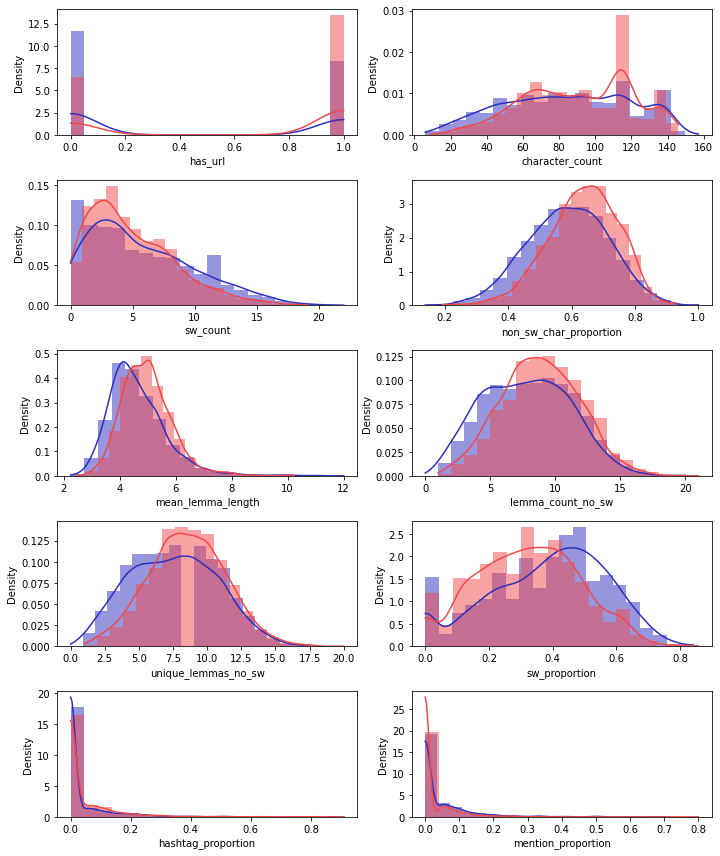

In [77]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
fl_ax = axes.flatten()

for idx, ftr in list(enumerate(meta_features_df_train.columns)):
    sns.histplot(meta_features_df_train[ftr][y_train==0], ax=fl_ax[idx], **kwargs_histplot, color=color_non)
    sns.histplot(meta_features_df_train[ftr][y_train==1], ax=fl_ax[idx], **kwargs_histplot, color=color_disaster)

plt.tight_layout()
plt.show()

The density plots above show that some of the meta-features I engineered have different distributions when separated by target class. Hopefully this provides more signal for the model.

In [78]:
time_check()

Time check: 6 minutes and 43 seconds


## Vectorizing the tweets

I've engineered linguistic features and meta-features. Now I'm going to make the actual text of the tweets interpretable by a machine learning model using [scikit-learn's TF-IDF vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). This vectorizer returns the [**term frequency-inverse document frequency**](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) (TF-IDF) of each token in each tweet.

TF-IDF is a measurement that takes into account the 1) token's frequency within the tweet and (term frequency) 2) how rare it is for the token to appear in a tweet (inverse document frequency). 

I'm using the lemmatized version of tweets with stop words removed. This is the version that looked the most different between classes when I graphed token frequencies earlier. The vectorizer will return TF-IDF values for the top 500 frequently occurring lemmas across the "corpus" -- which is the collection of tweets.

In [185]:
tfidf = TfidfVectorizer(
    tokenizer=spacy_lemmatize, 
    stop_words=stopword_list_lem,
    max_features=500
    )

X_train_vec = tfidf.fit_transform(X_train['text'])

X_train_vec_df = pd.DataFrame(
    X_train_vec.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=X_train.index
    )
X_train_vec_df.head()

,abc,ablaze,accident,actually,affect,ago,air,airplane,airport,ambulance,...,work,world,wound,wreck,wreckage,yeah,year,youtube,yr,zone
39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally, I'm going to combine the vectors with the other features I've engineered so far into a single DataFrame. All features are being scaled, as well.

**This is the DataFrame that the model will train on.**

In [186]:
X_train_combined_df = pd.concat(
    [
        X_train_vec_df,
        pos_vec_df_train, 
        ner_vec_df_train, 
        meta_features_df_train,
    ],
    axis=1
    )

# Scaling all features

scaler = StandardScaler()
X_train_combined_df_scaled = scaler.fit_transform(X_train_combined_df)
X_train_combined_df_scaled = pd.DataFrame(X_train_combined_df_scaled, index=X_train.index, columns=X_train_combined_df.columns)

X_train_combined_df_scaled.head()

,abc,ablaze,accident,actually,affect,ago,air,airplane,airport,ambulance,...,has_url,character_count,sw_count,non_sw_char_proportion,mean_lemma_length,lemma_count_no_sw,unique_lemmas_no_sw,sw_proportion,hashtag_proportion,mention_proportion
39,-0.063712,24.039418,-0.106811,-0.062105,-0.073456,-0.063024,-0.078158,-0.064788,-0.066128,-0.075068,...,-1.056584,-2.000603,-0.860117,-1.251505,-0.779544,-1.913161,-1.935395,0.799326,-0.391792,-0.443234
418,-0.063712,-0.060391,-0.106811,-0.062105,-0.073456,-0.063024,-0.078158,-0.064788,-0.066128,-0.075068,...,-1.056584,-0.862925,-0.860117,0.841910,1.341708,-0.681589,-0.639648,-0.605410,-0.391792,3.116885
4916,-0.063712,-0.060391,-0.106811,-0.062105,-0.073456,-0.063024,-0.078158,-0.064788,-0.066128,-0.075068,...,-1.056584,-1.324146,0.149080,-1.621299,-1.578133,-1.297375,-1.287522,1.361221,-0.391792,-0.443234
2126,-0.063712,-0.060391,-0.106811,-0.062105,-0.073456,-0.063024,-0.078158,-0.064788,-0.066128,-0.075068,...,-1.056584,1.750658,1.915175,-1.559667,-0.519134,0.549983,0.332162,1.165779,-0.391792,-0.443234
1054,-0.063712,-0.060391,-0.106811,-0.062105,-0.073456,-0.063024,-0.078158,-0.064788,-0.066128,-0.075068,...,-1.056584,-1.600878,-1.112416,0.629166,-0.945916,-1.297375,-1.287522,-1.073655,-0.391792,-0.443234


In [187]:
time_check()

Time check: 245 minutes and 7 seconds


#### Apply all pre-processing steps to test and validation sets.
The function below runs the `test` and `val` sets through the exact same preprocessing steps that the `train` set as undergone.

By default, the function makes use of the exact transformer objected that have been trained on `X_train`, in order to avoid data leakage.

In [188]:
def preprocess_tweets(
    df_to_process,
    tokenizer=tokenizer,
    stop_words=stopword_list, 
    lemmatizer=spacy_lemmatize,
    stop_words_lem=stopword_list_lem,
    trained_pos_vectorizer=pos_vectorizer,
    trained_ner_vectorizer=ner_vectorizer,
    trained_tfidf=tfidf,
    trained_scaler=scaler,
    return_scaled=True,
    return_cleaned=False
):
    index=df_to_process.index
    tweet_df = df_to_process.copy()

    tweet_df['location'] = tweet_df['location'].fillna('location_missing')

    tweet_df['text'] = tweet_df['text'].apply(lambda x: x.lower())
    has_url_Series = tweet_df['text'].apply(binary_url).rename('has_url')
    tweet_df['has_url'] = has_url_Series
    tweet_df['text'] = \
        tweet_df['text'].apply(lambda x: re.sub(pattern=r'http\S+', repl='', string=x))

    tweet_df['text'] = tweet_df['text'].apply(lambda x: re.sub("&amp;", "and", x))
    tweet_df['tokens'] = tweet_df['text'].apply(tokenizer.tokenize)
    tweet_df['tokens_no_sw'] = \
        tweet_df['tokens'].apply(lambda x: [w for w in x if not w in stop_words])

    tweet_df['lemmas'] = tweet_df['text'].apply(lemmatizer)
    tweet_df['lemmas_no_sw'] = \
        tweet_df['lemmas'].apply(lambda x: [l for l in x if l not in stop_words_lem])

    pos_vec = trained_pos_vectorizer.transform(tweet_df['text'])
    pos_vec_df = pd.DataFrame(
        pos_vec.toarray(), 
        columns=trained_pos_vectorizer.get_feature_names_out(),
        index=index
    )
    pos_vec_df_norm = pos_vec_df.div(pos_vec_df.sum(axis=1), axis=0)
    pos_vec_df_norm.columns = pos_vec_df.columns + '_norm'
    interesting_tags = ['ADP_norm', 'ADV_norm', 'AUX_norm', 'NOUN_norm', 'PRON_norm', 'PROPN_norm']
    pos_vec_df = pos_vec_df.join(pos_vec_df_norm[interesting_tags])

    ner_vec = trained_ner_vectorizer.transform(tweet_df['text'])
    ner_vec_df = pd.DataFrame(
        ner_vec.toarray(),
        columns=trained_ner_vectorizer.get_feature_names_out(),
        index=index
    )
    ner_vec_df['location_GPE'] = tweet_df['location'].apply(lambda x: int('GPE' in [ent.label_ for ent in nlp(x).ents]))

    meta_features_df = pd.DataFrame(has_url_Series)
    # Character count. Original tweet. No URL.
    meta_features_df['character_count'] = \
        tweet_df['text'].apply(len)
    # Stop word count. Original tweet. No URL.
    meta_features_df['sw_count'] = \
        tweet_df['tokens'].apply(lambda x: len([w for w in x if w in stop_words]))
    # Character count of non-stop-words / original character count. No URL.
    meta_features_df['non_sw_char_proportion'] = \
        tweet_df['tokens_no_sw'].apply(lambda x: len(''.join(x))) / tweet_df['text'].apply(len)
    # Average lemma length. Including stop words.
    meta_features_df['mean_lemma_length'] = \
        tweet_df['lemmas'].apply(lambda x: np.mean([len(l) for l in x]))
    # Lemma count. No stop words.
    meta_features_df['lemma_count_no_sw'] = \
        tweet_df['lemmas_no_sw'].apply(len)
    # Number of unique lemmas. No stop words.
    meta_features_df['unique_lemmas_no_sw'] = \
        tweet_df['lemmas_no_sw'].apply(lambda x: len(set(x)))
    # Proportion of stop words
    meta_features_df['sw_proportion'] = \
        tweet_df['tokens'].apply(lambda x: len([w for w in x if w in stop_words]))\
            / tweet_df['tokens'].apply(len)\
    # Proportion of hashtags
    meta_features_df['hashtag_proportion'] = \
        tweet_df['text'].apply(lambda x: len(re.findall(r'#{1}\w+', x)))\
            / tweet_df['tokens'].apply(len)
    # Proportion of mentions
    meta_features_df['mention_proportion'] = \
        tweet_df['text'].apply(lambda x: len(re.findall(r'@{1}\w+', x)))\
            / tweet_df['tokens'].apply(len)

    tweets_vec = trained_tfidf.transform(tweet_df['text'])
    tweets_vec_df = pd.DataFrame(
        tweets_vec.toarray(), 
        columns=trained_tfidf.get_feature_names_out(),
        index=index
    )
    tweets_combined_df = pd.concat(
        [
            tweets_vec_df,
            pos_vec_df,
            ner_vec_df,
            meta_features_df
        ],
        axis=1
    )
    tweets_combined_df_scaled = trained_scaler.transform(tweets_combined_df)
    tweets_combined_df_scaled = pd.DataFrame(tweets_combined_df_scaled, index=index, columns=tweets_combined_df.columns)

    if return_scaled:
        if return_cleaned:
            return {'processed':tweets_combined_df_scaled, 'cleaned':tweet_df}
        else:
            return tweets_combined_df_scaled
    else:
        if return_cleaned:
            return {'processed':tweets_combined_df, 'cleaned':tweet_df}
        else:
            return tweets_combined_df

In [189]:
X_test_combined_df_scaled = preprocess_tweets(X_test)
X_val_combined_df_scaled = preprocess_tweets(X_val)

In [190]:
time_check()

Time check: 246 minutes and 49 seconds


In [191]:
###########################################################
###########################################################

## Modeling

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

By default, Keras does not have a scorer for F1, as it does with accuracy, recall, and others. I will define the F1 scorer myself, using instructions from this [blog post](https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d).

In [192]:
import keras.backend as K

def K_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Defining scorers for Keras models

precision = Precision()
recall = Recall()
auc = AUC()
f1 = K_f1

In [193]:
# Defining a function to visualize neural network performance

def plot_nn_curves(model_history):

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
    fl_ax = axes.flatten()
    for idx, metric in enumerate(['loss', 'accuracy', 'precision', 'recall', 'auc', 'f1']):
        pair = [m for m in model_history.history.keys() if metric in m]
        fl_ax[idx].plot(model_history.history[pair[0]], label=metric)
        fl_ax[idx].plot(model_history.history[pair[1]], label=metric+'_val')
        fl_ax[idx].set_xlabel('epochs')
        fl_ax[idx].set_ylabel(metric)
        fl_ax[idx].set_title(f'{metric.upper()} Evaluation')
        fl_ax[idx].legend()
        plt.tight_layout();

In [194]:
n_input = X_train_combined_df_scaled.shape[1]
n_input

537

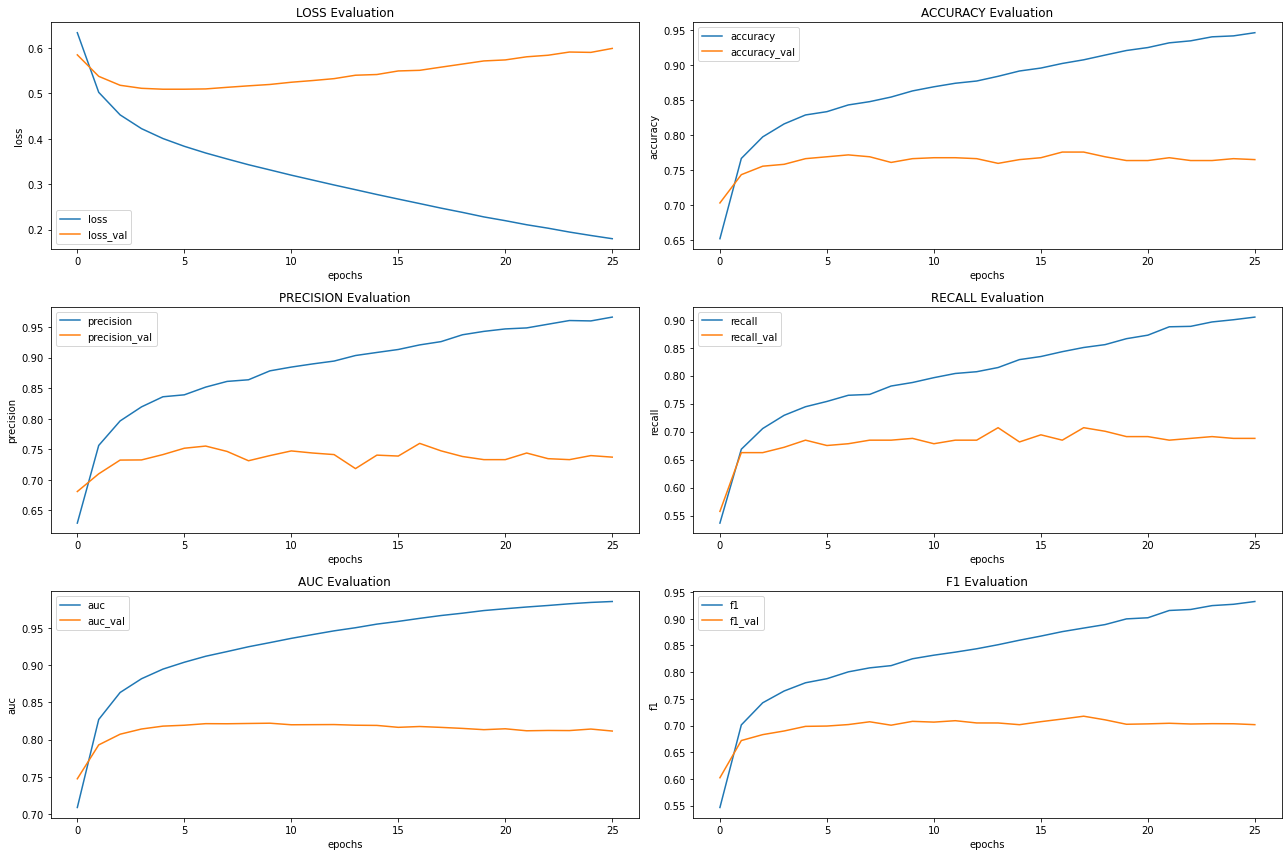

In [239]:
# Baseline with one hidden layer

model_baseline = models.Sequential()

model_baseline.add(layer=layers.Dense(
    units=round(n_input/2),
    activation='relu',
    input_shape=(n_input,)
))

model_baseline.add(layer=layers.Dense(
    units=1,
    activation='sigmoid',
))

model_baseline.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy', precision, recall, auc, f1]
)

early_stopping = [
    EarlyStopping(monitor='val_loss', patience=20)
    ]

model_hist_baseline = model_baseline.fit(
    np.array(X_train_combined_df_scaled),
    np.array(y_train),
    epochs=400,
    batch_size=32,
    validation_data=(X_val_combined_df_scaled, y_val),
    verbose=False,
    callbacks=early_stopping
)

plot_nn_curves(model_hist_baseline)

In [240]:
model_baseline.evaluate(X_val_combined_df_scaled, y_val)

24/24 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7648 - precision_4: 0.7372 - recall_4: 0.6879 - auc_4: 0.8116 - K_f1: 0.7016


[0.5989803671836853,
 0.7647849321365356,
 0.7372013926506042,
 0.6878980994224548,
 0.8115686774253845,
 0.7015953660011292]

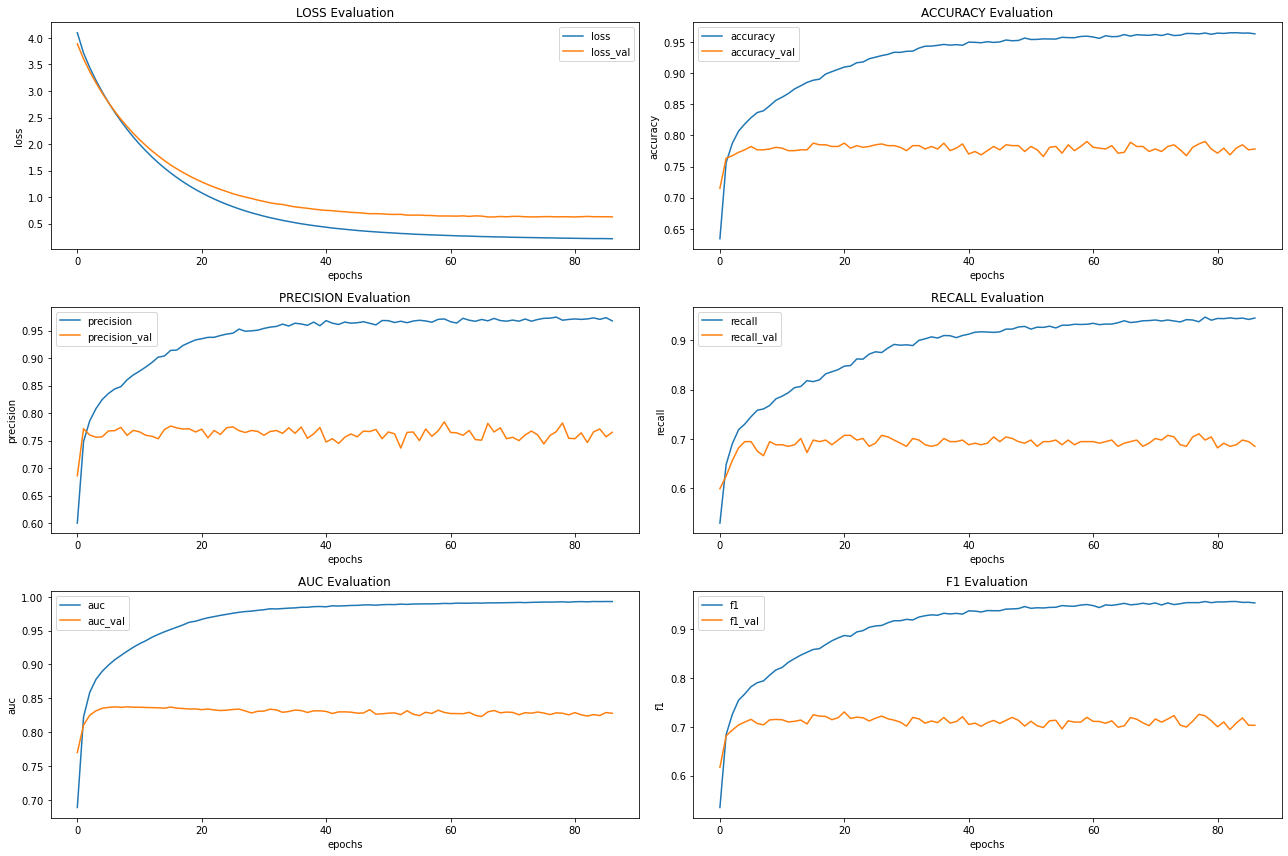

In [241]:
# Add regularization

model_1 = models.Sequential()

model_1.add(layer=layers.Dense(
    units=round(n_input/2),
    activation='relu',
    input_shape=(n_input,),
    kernel_regularizer=regularizers.l2()
))

model_1.add(layer=layers.Dense(
    units=1,
    activation='sigmoid',
))

model_1.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy', precision, recall, auc, f1]
)

early_stopping = [
    EarlyStopping(monitor='val_loss', patience=20)
    ]

model_hist_1 = model_1.fit(
    np.array(X_train_combined_df_scaled),
    np.array(y_train),
    epochs=400,
    batch_size=32,
    validation_data=(X_val_combined_df_scaled, y_val),
    verbose=False,
    callbacks=early_stopping
)

plot_nn_curves(model_hist_1)

In [242]:
model_1.evaluate(X_val_combined_df_scaled, y_val)

24/24 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7782 - precision_4: 0.7651 - recall_4: 0.6847 - auc_4: 0.8279 - K_f1: 0.7031


[0.6278175711631775,
 0.7782257795333862,
 0.7651245594024658,
 0.6847133636474609,
 0.8278810977935791,
 0.7031090259552002]

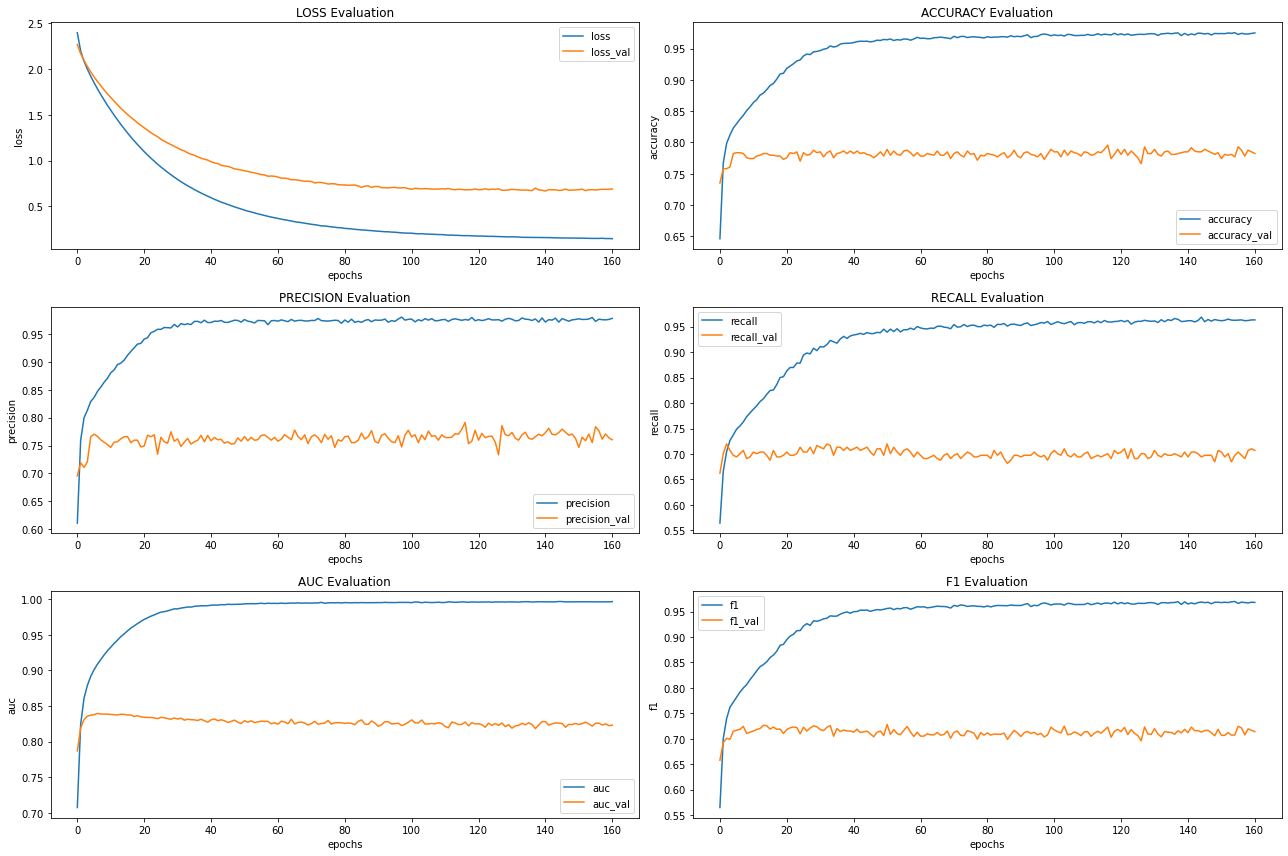

In [243]:
# Tweak regularization

model_2 = models.Sequential()

model_2.add(layer=layers.Dense(
    units=round(n_input/2),
    activation='relu',
    input_shape=(n_input,),
    kernel_regularizer=regularizers.l2(0.005)
))

model_2.add(layer=layers.Dense(
    units=1,
    activation='sigmoid',
))

model_2.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy', precision, recall, auc, f1]
)

early_stopping = [
    EarlyStopping(monitor='val_loss', patience=20)
    ]

model_hist_2 = model_2.fit(
    np.array(X_train_combined_df_scaled),
    np.array(y_train),
    epochs=400,
    batch_size=32,
    validation_data=(X_val_combined_df_scaled, y_val),
    verbose=False,
    callbacks=early_stopping
)

plot_nn_curves(model_hist_2)

In [244]:
model_2.evaluate(X_val_combined_df_scaled, y_val)

24/24 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.7823 - precision_4: 0.7603 - recall_4: 0.7070 - auc_4: 0.8232 - K_f1: 0.7139


[0.6898992657661438,
 0.7822580933570862,
 0.7602739930152893,
 0.7070063948631287,
 0.8232150673866272,
 0.7139379978179932]

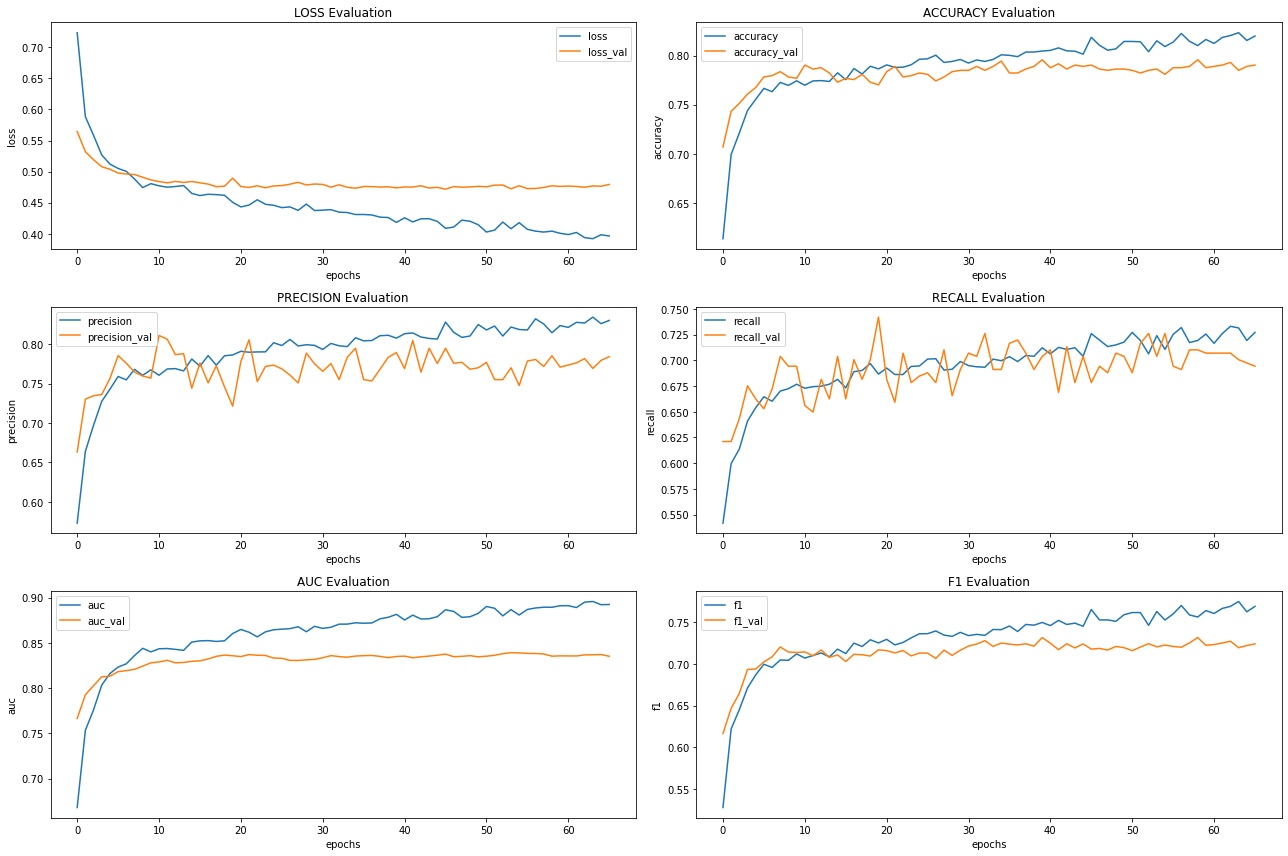

In [245]:
# Use dropout instead

model_3 = models.Sequential()

model_3.add(layers.Dropout(0.3, input_shape=(n_input,)))

model_3.add(layer=layers.Dense(
    units=round(n_input/2),
    activation='relu',
    # kernel_regularizer=regularizers.l2(0.005)
))
model_3.add(layers.Dropout(0.3))

model_3.add(layer=layers.Dense(
    units=1,
    activation='sigmoid',
))

model_3.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy', precision, recall, auc, f1]
)

early_stopping = [
    EarlyStopping(monitor='val_loss', patience=20)
    ]

model_hist_3 = model_3.fit(
    np.array(X_train_combined_df_scaled),
    np.array(y_train),
    epochs=400,
    batch_size=32,
    validation_data=(X_val_combined_df_scaled, y_val),
    verbose=False,
    callbacks=early_stopping
)

plot_nn_curves(model_hist_3)

In [246]:
model_3.evaluate(X_val_combined_df_scaled, y_val)

24/24 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7903 - precision_4: 0.7842 - recall_4: 0.6943 - auc_4: 0.8352 - K_f1: 0.7242


[0.47934263944625854,
 0.7903226017951965,
 0.7841726541519165,
 0.6942675113677979,
 0.8352022171020508,
 0.7241896986961365]

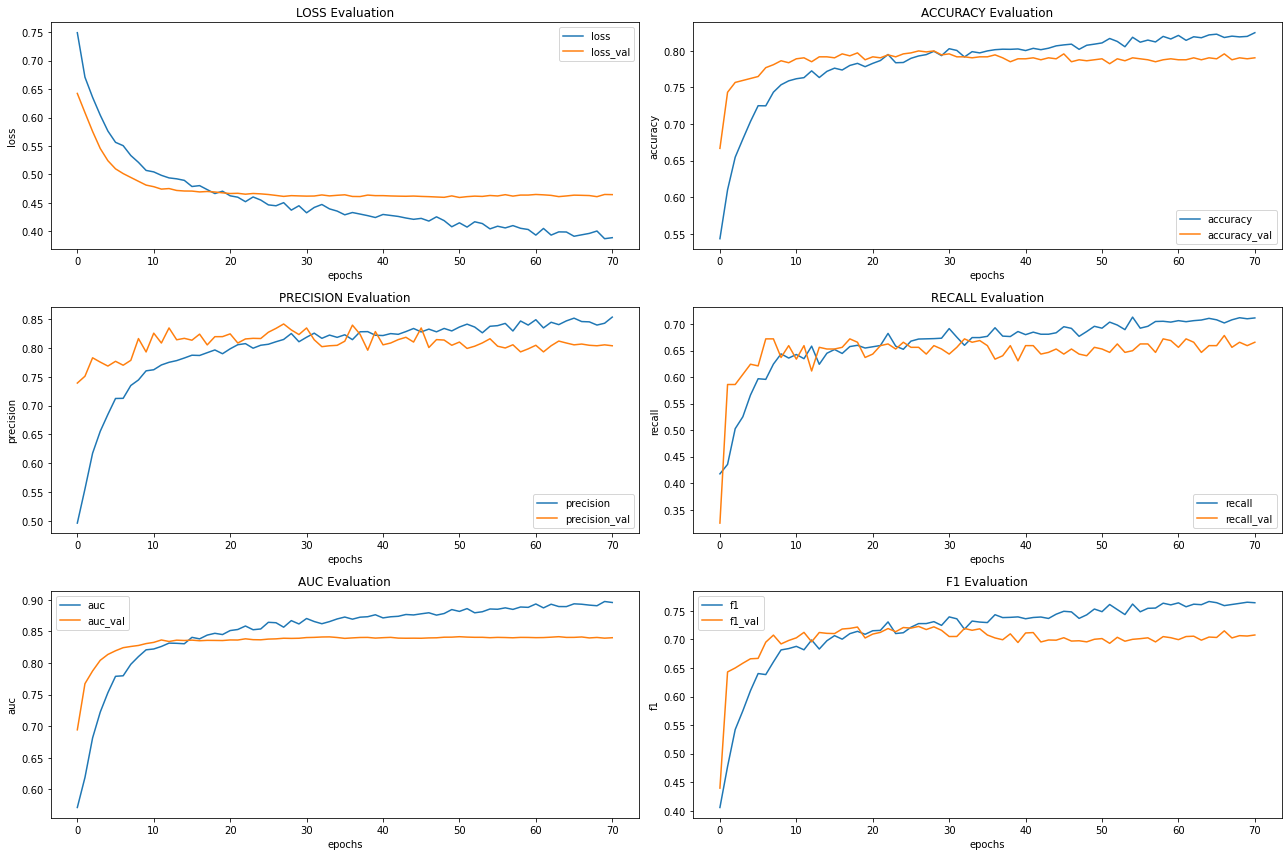

In [247]:
# Add more layers

model_4 = models.Sequential()

model_4.add(layers.Dropout(0.3, input_shape=(n_input,)))

model_4.add(layer=layers.Dense(
    units=n_input,
    activation='relu',
    # kernel_regularizer=regularizers.l2(0.005)
))
model_4.add(layers.Dropout(0.3))

model_4.add(layer=layers.Dense(
    units=round(n_input/2),
    activation='relu',
    # kernel_regularizer=regularizers.l2(0.005)
))
model_4.add(layers.Dropout(0.3))

model_4.add(layer=layers.Dense(
    units=round(n_input/4),
    activation='relu',
    # kernel_regularizer=regularizers.l2(0.005)
))
model_4.add(layers.Dropout(0.3))

model_4.add(layer=layers.Dense(
    units=1,
    activation='sigmoid',
))

model_4.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy', precision, recall, auc, f1]
)

early_stopping = [
    EarlyStopping(monitor='val_loss', patience=20)
    ]

model_hist_4 = model_4.fit(
    np.array(X_train_combined_df_scaled),
    np.array(y_train),
    epochs=400,
    batch_size=32,
    validation_data=(X_val_combined_df_scaled, y_val),
    verbose=False,
    callbacks=early_stopping
)

plot_nn_curves(model_hist_4)

In [248]:
model_4.evaluate(X_val_combined_df_scaled, y_val)

24/24 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7903 - precision_4: 0.8038 - recall_4: 0.6656 - auc_4: 0.8399 - K_f1: 0.7079


[0.4645146131515503,
 0.7903226017951965,
 0.8038461804389954,
 0.6656050682067871,
 0.8398829698562622,
 0.7078678607940674]

In [249]:
#########################################

In [250]:
time_check()

Time check: 286 minutes and 14 seconds


In [251]:
# Total time:
t = time.time() - start_time
print(f'Notebook run time: {t//60:.0f} minutes and {t%60:.0f} seconds')

Notebook run time: 286 minutes and 14 seconds
